# 01 - Implement *Perceptron* using *Vanilla Python*
Implement Frank Rosenblatt's **classic perceptron binary classification** <br>
only using **"pure (or vanilla)" Python**, however, *matplot* package is used just for visualization.

---

## 0) Import Libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import random

## 1) Loading the Dataset
Load `dataset.csv`.

In [4]:
# Read CSV file.
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))
        
print(len(X), len(y))

100 100


### Dataset Split & Visualization
For model learning and verification, divide the loaded dataset into **trainset** and **testset** and visualize the dataset to know how it is distributed.

In [5]:
# Set random seed
random.seed(123)

# Shuffle the dataset randomly
idx = list(range(len(X)))
random.shuffle(idx)

# Split the dataset (Up to the first 80 for training, and the rest for test)
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

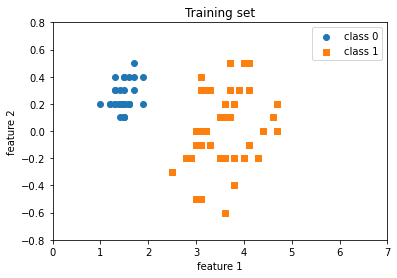

In [6]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 2) Implement Perceptron model
`Perceptron model` is composed of constructor, forward, backward, train, evaluation.
* At `__init__`, constructor initializes perceptron's weights and bias.
* At `forward`, Predict using input and perceptron's weights.
* At `backward`, Calculate the error to learn perceptron's weights.
* At `train`, Update the weight of Perceptron by repeating forward and backward in turn as a process of learning Perceptron.
* At `evaluation`, Predict the input data using the learned weights and return the results.


**Details**
* weights is initialized randomly, bias is initialized 0.
* activation function is unit step function.

#### Perceptron
![Perceptron](https://www.researchgate.net/profile/Daniel-Alvarez-34/publication/315788933/figure/fig3/AS:479799241121795@1491404461957/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the.png)
Reference: https://www.researchgate.net/figure/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the_fig3_315788933

In [7]:
class Perceptron():
    def __init__(self, num_features):
        self.weights = [random.random() for i in range(num_features)]
        self.bias = 0

    def forward(self, x):
        linear = self.bias
        for i in range(len(x)):
            linear += x[i] * self.weights[i]
        prediction = 1 if linear > 0 else 0
        return prediction
        
        
    def backward(self, x, y):
        errors = [0 for i in range(len(x) + 1)] # x0 + X\s
        predicted = self.forward(x)
        
        if predicted != y:
            error = predicted - y
            for i in range(len(errors)):
                if i==0:
                    errors[i] = 1 * error
                else:
                    errors[i] = x[i-1] * error
                
        return errors
        
    def train(self, x, y, epochs):
        alpha = 0.01 # learning rate
        # epochs 만큼 학습
        for e in range(epochs):
            # 데이터 하나씩 학습
            for i in range(len(y)):
                totErr = self.backward(x[i], y[i])
                for j in range(len(totErr)):
                    if j == 0:
                        self.bias = self.bias - alpha * totErr[j]
                    else:
                        self.weights[j-1] = self.weights[j-1] - alpha * totErr[j]
                
    def evaluate(self, x, y):
        accuracy = 0
        for i in range(len(y)):
            predicted = self.forward(x[i])
            if predicted == y[i]:
                accuracy += 1
        
        accuracy /= len(y)
        return accuracy

## 3) Learn Perceptron
Using Trainet, Train 5 epochs and print the learned Perceptron.

In [16]:
ppn = Perceptron(num_features=2)  # Define Perceptron model
ppn.train(X_train, y_train, 5)    # Train 5 epoch

# Print weight, bias of trained model
print(ppn.weights)
print(ppn.bias)

[0.12481148264314636, 0.07158973057390494]
-0.2700000000000001


### 4) Model Evaluation
Calculate the accuracy of model.

In [17]:
# Evaluate model on Train dataset
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [18]:
# Evaluate model on Test dataset
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## 5) Decision Boundary
Plot 2 scatter plot using train dataset and test dataset, and visualize decision boundary using trained weights.

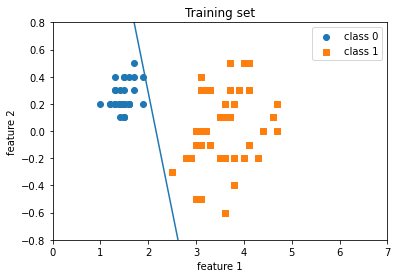

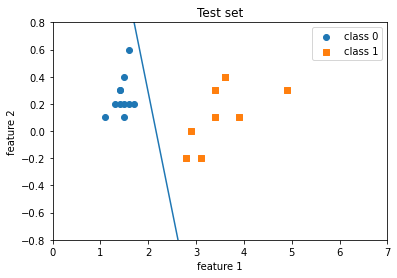

In [19]:
### Train 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

### Test 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()